## Exercise 3
anper@itu.dk

### Task 1

The XOR problem consists of four points $\mathbf{x}_n$, $n=1,\ldots,4$ from two classes, which are not linearly separable, as follows:

<ol>
 <li> class 1: $\mathbf{x}_1=\begin{pmatrix} 1\\ 1 \end{pmatrix}$, $\mathbf{x}_2=\begin{pmatrix} -1\\ -1 \end{pmatrix}$, with labels $t_1=+1$, $t_2=+1$</li>
 <li> class 2: $\mathbf{x}_3=\begin{pmatrix} -1\\ 1 \end{pmatrix}$, $\mathbf{x}_4=\begin{pmatrix} 1\\ -1 \end{pmatrix}$, with labels $t_3=-1$, $t_4=-1$.</li>
</ol>

The goal of this exercise is to compute the discriminant
$$g(\mathbf{x}) = \mathbf{w}^T \mathbf{\phi}(\mathbf{x}),$$
which enables a linear classification in a higher dimension using the basis function $\mathbf{\phi}$.


a) Draw the points and plot them such that the two different classes can be distinguished (either by color and or marker).

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
# Class 1
x1= [1, 1]
x2 = [-1, -1]
# Class 2
x3 = [-1, 1]
x4= [1, -1]

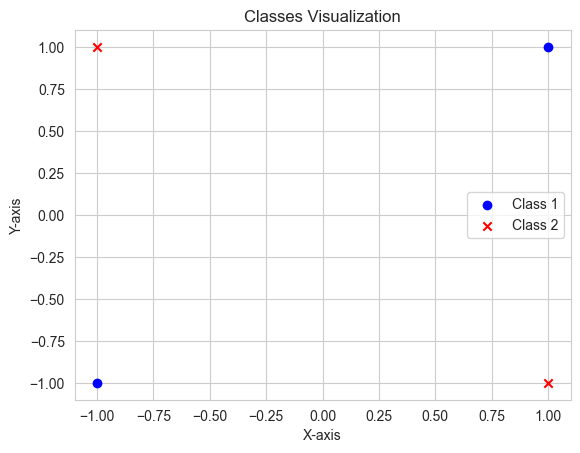

In [98]:
# Plotting Class 1 points in blue
plt.scatter(x1[0], x1[1], color='blue', marker='o', label='Class 1')
plt.scatter(x2[0], x2[1], color='blue', marker='o')

# Plotting Class 2 points in red
plt.scatter(x3[0], x3[1], color='red', marker='x', label='Class 2')
plt.scatter(x4[0], x4[1], color='red', marker='x')

# Setting plot labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Classes Visualization')
plt.grid(True)
plt.legend()
plt.show()

b) Since the points are not linearly separable in 2D, they will be transferred to a higher dimension in an attempt to make them linearly separable in a higher dimension. Use the following basis function to transfer each of the four 2D points to 6D:
$$
\mathbf{\phi} : \mathbb{R}^2 \rightarrow \mathbb{R}^6
$$

$$
\mathbf{\phi}(\mathbf{x}) = \mathbf{\phi} (x_1, x_2) = \left(1, \sqrt{2}x_1, \sqrt{2}x_2, \sqrt{2}x_1x_2, x_1^2, x_2^2\right)^T
$$

i.e. calculate
$$
\mathbf{z}_n = \mathbf{\phi}(\mathbf{x}_n)\), \(n = 1, \ldots, 4 = N)
$$

$$
\mathbf{z}_1 = \left(1, \sqrt{2} \cdot 1, \sqrt{2} \cdot 1, \sqrt{2} \cdot 1 \cdot 1, 1^2, 1^2\right)^T
$$

$$
= \left(1, \sqrt{2}, \sqrt{2}, \sqrt{2}, 1, 1\right)^T
$$

$$
\mathbf{z}_2 = \left(1, \sqrt{2} \cdot (-1), \sqrt{2} \cdot (-1), \sqrt{2} \cdot (-1) \cdot (-1), (-1)^2, (-1)^2\right)^T
$$

$$
= \left(1, -\sqrt{2}, -\sqrt{2}, \sqrt{2}, 1, 1\right)^T
$$

$$
\mathbf{z}_3 = \left(1, \sqrt{2} \cdot (-1), \sqrt{2} \cdot 1, \sqrt{2} \cdot (-1) \cdot 1, (-1)^2, 1^2\right)^T
$$

$$
= \left(1, -\sqrt{2}, \sqrt{2}, -\sqrt{2}, 1, 1\right)^T
$$

$$
\mathbf{z}_4 = \left(1, \sqrt{2} \cdot 1, \sqrt{2} \cdot (-1), \sqrt{2} \cdot 1 \cdot (-1), 1^2, (-1)^2\right)^T
$$

$$
= \left(1, \sqrt{2}, -\sqrt{2}, -\sqrt{2}, 1, 1\right)^T
$$


Transpose:


$$\mathbf{z}_1 = \begin{pmatrix}
1 \\
\sqrt{2} \\
\sqrt{2} \\
\sqrt{2} \\
1 \\
1 \\
\end{pmatrix}

\mathbf{z}_2 = \begin{pmatrix}
1 \\
-\sqrt{2} \\
-\sqrt{2} \\
\sqrt{2} \\
1 \\
1 \\
\end{pmatrix}

\mathbf{z}_3 = \begin{pmatrix}
1 \\
-\sqrt{2} \\
\sqrt{2} \\
-\sqrt{2} \\
1 \\
1 \\
\end{pmatrix}

\mathbf{z}_4 = \begin{pmatrix}
1 \\
\sqrt{2} \\
-\sqrt{2} \\
-\sqrt{2} \\
1 \\
1 \\
\end{pmatrix}$$


In [99]:
# Define the transformed points z_n = phi(x_n)
z = np.array([[1, np.sqrt(2), np.sqrt(2), np.sqrt(2), 1, 1],
              [1, -np.sqrt(2), -np.sqrt(2), np.sqrt(2), 1, 1],
              [1, -np.sqrt(2), np.sqrt(2), -np.sqrt(2), 1, 1],
              [1, np.sqrt(2), -np.sqrt(2), -np.sqrt(2), 1, 1]])

z1, z2, z3, z4 = z

print("z1:", z1)
print("z2:", z2)
print("z3:", z3)
print("z4:", z4)

z1: [1.         1.41421356 1.41421356 1.41421356 1.         1.        ]
z2: [ 1.         -1.41421356 -1.41421356  1.41421356  1.          1.        ]
z3: [ 1.         -1.41421356  1.41421356 -1.41421356  1.          1.        ]
z4: [ 1.          1.41421356 -1.41421356 -1.41421356  1.          1.        ]


c) Use the known values to complete Eq. (7.10) from Bishop [PR]
	$$\tilde{L}(\mathbf{a})=\tilde{L}\left(a_1,a_2,a_3,a_4 \right) =\sum\limits_{n=1}^4 a_n -\frac{1}{2} \sum\limits_{m=1}^4 \sum\limits_{n=1}^4 a_n a_m t_n t_m \mathbf{\phi}(\mathbf{x}_n)^T\mathbf{\phi}(\mathbf{x}_m)$$,
	 where k$(\mathbf{x}_n,\mathbf{x}_m)=\mathbf{\phi}(\mathbf{x}_n)^T\mathbf{\phi}(\mathbf{x}_m)$. Note: The values $a_n$ are unknown at this point. A solution for this specific data set will be derived by you in task e.

$$
\text{The Lagrange dual function has the term:}
$$

$$
k(\mathbf{x}_n, \mathbf{x}_m) = \mathbf{\phi}(\mathbf{x}_n)^T \mathbf{\phi}(\mathbf{x}_m)
$$

$$
\text{For } n = 1, m = 1:
$$

$$
k(\mathbf{x}_1, \mathbf{x}_1) = \mathbf{z}_1^T \mathbf{z}_1
= \left[ 1, \sqrt{2}, \sqrt{2}, 2, 1, 1 \right] \left[ 1, \sqrt{2}, \sqrt{2}, 2, 1, 1 \right]^T
$$

$$
\text{For } n = 1, m = 2:
$$

$$
k(\mathbf{x}_1, \mathbf{x}_2) = \mathbf{z}_1^T \mathbf{z}_2
= \left[ 1, \sqrt{2}, \sqrt{2}, 2, 1, 1 \right] \left[ 1, -\sqrt{2}, -\sqrt{2}, 2, 1, 1 \right]^T
$$

$$
\text{... and so on for every combination of } n \text{ and } m.
$$

$$
\text{The kernel matrix:}
$$

$$
\begin{bmatrix}
k(\mathbf{x}_1, \mathbf{x}_1) & k(\mathbf{x}_1, \mathbf{x}_2) & k(\mathbf{x}_1, \mathbf{x}_3) & k(\mathbf{x}_1, \mathbf{x}_4) \\
k(\mathbf{x}_2, \mathbf{x}_1) & k(\mathbf{x}_2, \mathbf{x}_2) & k(\mathbf{x}_2, \mathbf{x}_3) & k(\mathbf{x}_2, \mathbf{x}_4) \\
k(\mathbf{x}_3, \mathbf{x}_1) & k(\mathbf{x}_3, \mathbf{x}_2) & k(\mathbf{x}_3, \mathbf{x}_3) & k(\mathbf{x}_3, \mathbf{x}_4) \\
k(\mathbf{x}_4, \mathbf{x}_1) & k(\mathbf{x}_4, \mathbf{x}_2) & k(\mathbf{x}_4, \mathbf{x}_3) & k(\mathbf{x}_4, \mathbf{x}_4) \\
\end{bmatrix}
$$





In [100]:
def kernel(xn, xm):
    return np.dot(xn, xm)

k_values = []
for z_i in [z1, z2, z3, z4]:
    row = []
    for z_j in [z1, z2, z3, z4]:
        row.append(kernel(z_i, z_j))
    k_values.append(row)

print(np.array(k_values))

[[9. 1. 1. 1.]
 [1. 9. 1. 1.]
 [1. 1. 9. 1.]
 [1. 1. 1. 9.]]


d) Compute the derivative of $\tilde{L}(\mathbf{a} )$ with respect to $a_k$, i.e. the four components of the gradient
$$\nabla \tilde{L}(\mathbf{a}) =  \begin{pmatrix} \frac{\partial}{\partial a_1} \tilde{L}\left(a_1,a_2,a_3,a_4 \right) \\				\frac{\partial}{\partial a_2} \tilde{L}\left(a_1,a_2,a_3,a_4 \right)\\				\frac{\partial}{\partial a_3} \tilde{L}\left(a_1,a_2,a_3,a_4 \right)\\				\frac{\partial}{\partial a_4} \tilde{L}\left(a_1,a_2,a_3,a_4 \right) \end{pmatrix} = \ldots  $$

$$
\frac{\partial}{\partial a_1} \tilde{L}(\mathbf{a}) = 1 - \sum_{m=1}^{4} a_m t_1 t_m k(\mathbf{x}_1, \mathbf{x}_m)
$$

$$
= 1 - a_1 t_1 t_1 k(\mathbf{x}_1, \mathbf{x}_1) - a_2 t_1 t_2 k(\mathbf{x}_1, \mathbf{x}_2) - a_3 t_1 t_3 k(\mathbf{x}_1, \mathbf{x}_3) - a_4 t_1 t_4 k(\mathbf{x}_1, \mathbf{x}_4)
$$

$$
= 1 - 9a_1 - a_2 + a_3 + a_4
$$

$$
\frac{\partial}{\partial a_2} \tilde{L}(\mathbf{a}) = 1 - \sum_{m=1}^{4} a_m t_2 t_m k(\mathbf{x}_2, \mathbf{x}_m)
$$

$$
= 1 - a_1 t_2 t_1 k(\mathbf{x}_2, \mathbf{x}_1) - a_2 t_2 t_2 k(\mathbf{x}_2, \mathbf{x}_2) - a_3 t_2 t_3 k(\mathbf{x}_2, \mathbf{x}_3) - a_4 t_2 t_4 k(\mathbf{x}_2, \mathbf{x}_4)
$$

$$
= 1 - a_1 - 9a_2 + a_3 + a_4
$$

$$
\frac{\partial}{\partial a_3} \tilde{L}(\mathbf{a}) = 1 - \sum_{m=1}^{4} a_m t_3 t_m k(\mathbf{x}_3, \mathbf{x}_m)
$$

$$
= 1 - a_1 t_3 t_1 k(\mathbf{x}_3, \mathbf{x}_1) - a_2 t_3 t_2 k(\mathbf{x}_3, \mathbf{x}_2) - a_3 t_3 t_3 k(\mathbf{x}_3, \mathbf{x}_3) - a_4 t_3 t_4 k(\mathbf{x}_3, \mathbf{x}_4)
$$

$$
= 1 + a_1 + a_2 - 9a_3 - a_4
$$

$$
\frac{\partial}{\partial a_4} \tilde{L}(\mathbf{a}) = 1 - \sum_{m=1}^{4} a_m t_4 t_m k(\mathbf{x}_4, \mathbf{x}_m)
$$

$$
= 1 - a_1 t_4 t_1 k(\mathbf{x}_4, \mathbf{x}_1) - a_2 t_4 t_2 k(\mathbf{x}_4, \mathbf{x}_2) - a_3 t_4 t_3 k(\mathbf{x}_4, \mathbf{x}_3) - a_4 t_4 t_4 k(\mathbf{x}_4, \mathbf{x}_4)
$$

$$
= 1 + a_1 + a_2 - a_3 - 9a_4
$$




e) Derive the equation system from $\nabla\tilde{L}(\mathbf{a})=0$ and solve for $\mathbf{a}=\left(a_1,a_2,a_3,a_4 \right)^T$.
	Hint: One example to rewrite a 2D gradient of a function into a non-homogeneous equation system: $$ \nabla f(\mathbf{x})= \begin{pmatrix} x_1+3x_2 + b_1\\2x_1-x_2+b_2\end{pmatrix} = \begin{pmatrix} 1 &3\\2& -1\end{pmatrix}\begin{pmatrix} x_1\\ x_2\end{pmatrix}+ \begin{pmatrix} b_1\\ b_2 \end{pmatrix}= \mathbf{A}\mathbf{x}+\mathbf{b} \stackrel{!}{=} \mathbf{0}$$

$$
\begin{align*}
1 - 9a_1 - a_2 + a_3 + a_4 &= 0 \\
1 - a_1 - 9a_2 + a_3 + a_4 &= 0 \\
1 + a_1 + a_2 - 9a_3 - a_4 &= 0 \\
1 + a_1 + a_2 - a_3 - 9a_4 &= 0 \\
\end{align*}
$$
$$
\begin{bmatrix}
-9 & -1 & 1 & 1 \\
-1 & -9 & 1 & 1 \\
1 & 1 & -9 & -1 \\
1 & 1 & -1 & -9 \\
\end{bmatrix}
\begin{bmatrix}
a_1 \\
a_2\\
a_3\\
a_4\\
\end{bmatrix}
=
\begin{bmatrix}
-1 \\
-1 \\
-1 \\
-1 \\
\end{bmatrix}
$$

In [101]:
# Define matrix A using numpy arrays
A = np.array([[-9, -1, 1, 1],
              [-1, -9, 1, 1],
              [1, 1, -9, -1],
              [1, 1, -1, -9]])

# Define matrix B
b = np.array([-1, -1, -1, -1])

# Solve the linear system of equations for a
a = np.linalg.solve(A, b)

print(a)

[0.125 0.125 0.125 0.125]


f) Which of the four training points are support vectors? How do the values of $a_n$ answer this question?

R = The non-zero values of $a_n$ indicate that the corresponding training point is a support vector. Since all $a_n$ values are non-zero, all training points are support vectors.

g) Now that all four values of $\mathbf{a}$ have been computed, employ Eq.(7.29) to compute $\mathbf{w}$:
	$$
	\mathbf{w} = \sum_{n=1}^4 a_n  t_n \mathbf{z}_n = \sum_{n=1}^4 a_n  t_n \mathbf{\phi}(\mathbf{x}_n)
	$$

Please note: $\mathbf{w},\mathbf{z}_n\in\mathbb{R}^6$ and  $t_n\in\mathbb{R}$.

In [102]:
# Given labels t
t = np.array([1, 1, -1, -1])

# Calculate w
w = np.dot(a * t, z)
print(w)

[ 2.77555756e-17 -5.55111512e-17  3.92523115e-17  7.07106781e-01
  2.77555756e-17  2.77555756e-17]


h) Give the discriminant function $g$ based on the original input space
	 $$g(\mathbf{x}) = g(x_1,x_2)= \mathbf{w}^T \mathbf{\phi}(\mathbf{x})= \ldots$$


In [103]:
g_x = np.dot(z, w.T)
g_x

array([ 1.,  1., -1., -1.])

i) Apply the discriminant function and compute the resulting values for the training input samples $g(\mathbf{x}_i)$, $i=1,\ldots, 4$. How are they classified? Are they correctly classified? </li>
</ol>

In [104]:
for i in range(4):
    g_x = np.dot(w, z[i])
    print(f"g(x_{i+1}) = {g_x}. Classified as {'Class 1' if g_x > 0 else 'Class 2'}")

g(x_1) = 1.0. Classified as Class 1
g(x_2) = 1.0. Classified as Class 1
g(x_3) = -0.9999999999999999. Classified as Class 2
g(x_4) = -1.0. Classified as Class 2


$x_1$ and $x_2$ are in Class 1 and have labels $t_1 = +1$ and $t_2 = +1$.
Both $x_1$ and $x_2$ are correctly classified as Class 1 by the discriminant function.
$x_3$ and $x_4$ are in Class 2 and have labels $t_3 = -1$ and $t_3 = -1$.
Both $x_3$ and $x_4$ are correctly classified as Class 2 by the discriminant function.

In conclusion, all of the training points are correctly classified based on the provided labels.